# Описание задачи: 

Нужно понять вот что: какая задача занимает больше всего времени, и как менялось соотношение по затратам со временем(т.е. как было раньше и как сейчаc).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Шаг №1. Знакомство с данными

In [2]:
df = pd.read_csv('times.csv', header='infer')

In [3]:
df

,1579648592965,0,:core-ui:preBuild,true,false,true.1,2,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411160,1583510443156,735,:app:mergeDevDebugAndroidTestJavaResource,True,False,True,126,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411165 entries, 0 to 411164
Data columns (total 11 columns):
1579648592965                               411165 non-null int64
0                                           411165 non-null int64
:core-ui:preBuild                           411165 non-null object
true                                        411165 non-null bool
false                                       411165 non-null bool
true.1                                      411165 non-null bool
2                                           411165 non-null int64
2020-01-21T23:16:32,965Z                    411165 non-null object
Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz    411165 non-null object
34359738368                                 411165 non-null int64
Mac OS X 10.15.2 x86_64                     411165 non-null object
dtypes: bool(3), int64(4), object(4)
memory usage: 26.3+ MB


### Вывод:
Мы ознакомились с полученными данными и сразу заметно, что у нас нет пропусков + придется изменять типы данных для дальнейшего анализа.

## Шаг №2. Предобработка данных 

In [5]:
df

,1579648592965,0,:core-ui:preBuild,true,false,true.1,2,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411160,1583510443156,735,:app:mergeDevDebugAndroidTestJavaResource,True,False,True,126,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


Мы видим, что здесь нет названия колонок, поэтому возьмем их из документации. 

Все что сейчас находится в `df.columns` переведем в данные.

In [6]:
df.columns 

Index(['1579648592965', '0', ':core-ui:preBuild', 'true', 'false', 'true.1',
       '2', '2020-01-21T23:16:32,965Z',
       'Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz', '34359738368',
       'Mac OS X 10.15.2 x86_64'],
      dtype='object')

In [7]:
df.loc[411165] = df.columns 

Теперь зададим названия колонкам. 

In [8]:
df.columns = ["timestamp", "num", "task", "success", "did_work", "skipped", "milliseconds", "start_time", "processor", "ram", "os"]

In [9]:
df

,timestamp,num,task,success,did_work,skipped,milliseconds,start_time,processor,ram,os
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411164,1583510443156,739,:app:assembleDevDebugAndroidTest,True,False,False,0,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


In [10]:
df['num']= pd.to_numeric(df['num'])
df['milliseconds']= pd.to_numeric(df['milliseconds'])
df['success'] = df['success'].astype(bool)
df['did_work'] = df['did_work'].astype(bool)
df['skipped'] = df['skipped'].astype(bool)
df['start_time'] = pd.to_datetime(df['timestamp'], unit='ms')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411166 entries, 0 to 411165
Data columns (total 11 columns):
timestamp       411166 non-null object
num             411166 non-null int64
task            411166 non-null object
success         411166 non-null bool
did_work        411166 non-null bool
skipped         411166 non-null bool
milliseconds    411166 non-null int64
start_time      411166 non-null datetime64[ns]
processor       411166 non-null object
ram             411166 non-null object
os              411166 non-null object
dtypes: bool(3), datetime64[ns](1), int64(2), object(5)
memory usage: 29.4+ MB


In [12]:
df

,timestamp,num,task,success,did_work,skipped,milliseconds,start_time,processor,ram,os
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411164,1583510443156,739,:app:assembleDevDebugAndroidTest,True,False,False,0,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


In [14]:
df['seconds'] = df['milliseconds']/1000

In [15]:
top10 = df.pivot_table(index = 'task', values = 'seconds', aggfunc = ('sum')).sort_values(by ='seconds', ascending = False).head(10).index

In [21]:
onlytop10 = df.query('task in @top10').reset_index()

In [22]:
onlytop10

,index,timestamp,num,task,success,did_work,skipped,milliseconds,start_time,processor,ram,os,seconds
0,361,1579649226999,179,:app:mergeDevDebugResources,True,True,False,12810,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,12.810
1,384,1579649226999,202,:data:compileDebugKotlin,True,True,False,30991,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,30.991
2,554,1579649226999,372,:app:kaptGenerateStubsDevDebugKotlin,True,True,False,46769,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,46.769
3,667,1579649226999,485,:app:kaptDevDebugKotlin,True,True,False,303,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.303
4,668,1579649226999,486,:app:compileDevDebugKotlin,True,True,False,106225,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,106.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,411127,1583510443156,702,:app:compileDevDebugKotlin,True,False,True,240,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.240
5290,411129,1583510443156,704,:app:compileDevDebugJavaWithJavac,True,False,True,104,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.104
5291,411133,1583510443156,708,:app:transformClassesWithDexBuilderForDevDebug,True,False,True,301,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.301
5292,411137,1583510443156,712,:app:packageDevDebug,True,False,True,4,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.004


In [24]:
df.pivot_table(index = 'task', values = 'seconds', aggfunc = ('sum')).sort_values(by ='seconds', ascending = False).head(10)

,seconds
task,
:app:compileDevDebugKotlin,19160.584
:app:kaptGenerateStubsDevDebugKotlin,8350.471
:app:compileDevDebugAndroidTestKotlin,2172.010
:app:transformClassesWithDexBuilderForDevDebug,2138.753
:app:transformDexArchiveWithDexMergerForDevDebug,1995.085
:data:compileDebugKotlin,1914.173
:app:kaptDevDebugKotlin,1598.028
:app:compileDevDebugJavaWithJavac,1309.848
:app:packageDevDebug,1211.887


In [29]:
onlytop10.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5294 entries, 0 to 5293
Data columns (total 13 columns):
index           5294 non-null int64
timestamp       5294 non-null object
num             5294 non-null int64
task            5294 non-null object
success         5294 non-null bool
did_work        5294 non-null bool
skipped         5294 non-null bool
milliseconds    5294 non-null int64
start_time      5294 non-null datetime64[ns]
processor       5294 non-null object
ram             5294 non-null object
os              5294 non-null object
seconds         5294 non-null float64
dtypes: bool(3), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 429.2+ KB


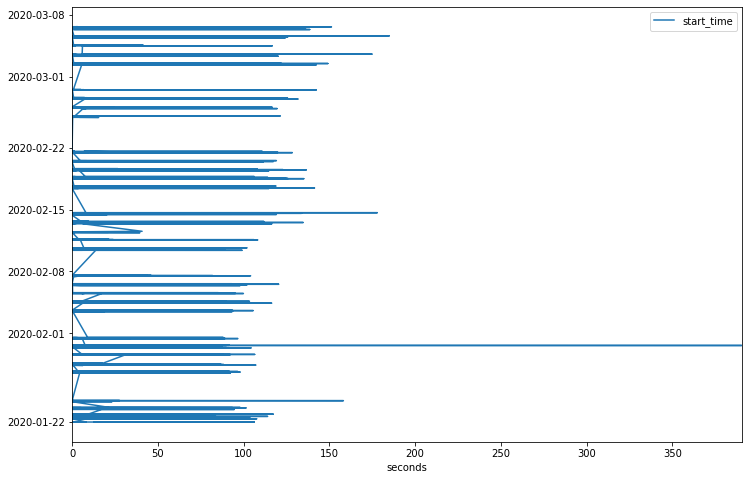

In [41]:
onlytop10.plot(kind = 'line', x = 'seconds', y = 'start_time', figsize = (12, 8))

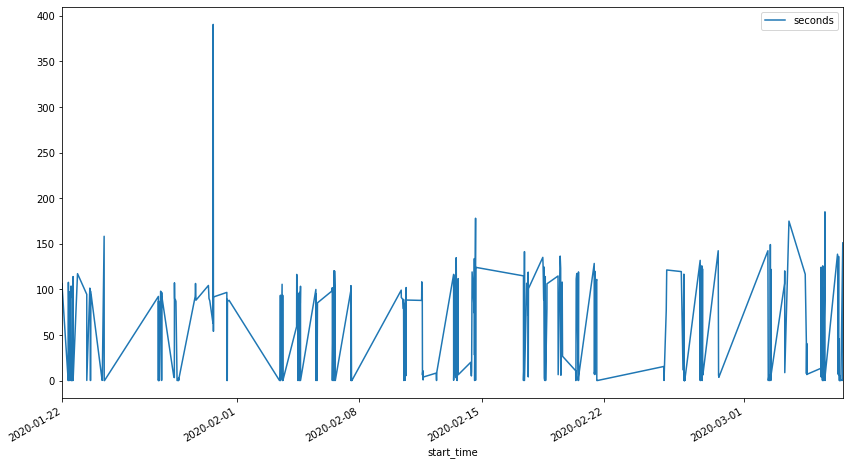

In [38]:
onlytop10.query('task == ":app:compileDevDebugKotlin"').plot(kind = 'line', y = 'seconds', x = 'start_time', figsize = (14, 8))